# Life Expectancy Analysis

## Import Libraries and fetching the dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#creating dataframe of life expectancy dataset
df= pd.read_csv("Life Expectancy Data.csv", index_col=0)
df.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Data Analysis

In [9]:
#number of rows and columns in a dataframe
df.shape

(2938, 21)

In [10]:
#columns in a dataframe
df.columns

Index(['Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [11]:
#summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2938 entries, Afghanistan to Zimbabwe
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Status                           2938 non-null   object 
 2   Life expectancy                  2928 non-null   float64
 3   Adult Mortality                  2928 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2904 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2919 non-null   float64
 12  Total expen

In [12]:
#statistical details of dataframe
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


## Data Cleaning 

In [13]:
#check the null values in each column
df.isna().sum()

Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [2]:
#removing unessential columns
df= df.drop(['Year', 'infant deaths'], axis=1, inplace= False)
df

,Status,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,Developing,65.0,263.0,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
Afghanistan,Developing,59.9,271.0,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
Afghanistan,Developing,59.9,268.0,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
Afghanistan,Developing,59.5,272.0,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
Afghanistan,Developing,59.2,275.0,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zimbabwe,Developing,44.3,723.0,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
Zimbabwe,Developing,44.5,715.0,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
Zimbabwe,Developing,44.8,73.0,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0


In [3]:
#replacing categorical values of column status with binary values
cleanup_nums = {"Status":     {"Developing": 0, "Developed": 1}}
df = df.replace(cleanup_nums)
df.head()

,Status,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,0,65.0,263.0,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
Afghanistan,0,59.9,271.0,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
Afghanistan,0,59.9,268.0,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
Afghanistan,0,59.5,272.0,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
Afghanistan,0,59.2,275.0,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
#splitting the data into separate groups to perform computations for better analysis.
df = df.groupby('Country').mean()
df.head()

,Status,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,0,58.19375,269.0625,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.3750,8.252500,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250
Albania,0,75.15625,45.0625,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.1250,5.945625,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750
Algeria,0,73.61875,108.1875,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,91.7500,4.604000,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250
Angola,0,49.01875,328.5625,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,46.1250,3.919333,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375
Antigua and Barbuda,0,75.05625,127.5000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,96.9375,4.791333,98.3125,0.12500,9759.305728,NaN,3.42500,3.37500,0.488625,8.84375


In [17]:
#checking the null values after preprocessing the data
df.isna().sum()

Status                              0
Life expectancy                    10
Adult Mortality                    10
Alcohol                             2
percentage expenditure              0
Hepatitis B                         9
Measles                             0
 BMI                                4
under-five deaths                   0
Polio                               0
Total expenditure                   2
Diphtheria                          0
 HIV/AIDS                           0
GDP                                30
Population                         48
 thinness  1-19 years               4
 thinness 5-9 years                 4
Income composition of resources    17
Schooling                          13
dtype: int64

In [5]:
#dropping the null values
df = df.dropna()

In [19]:
#verifying the data contain zero null values
df.isna().sum()

Status                             0
Life expectancy                    0
Adult Mortality                    0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [20]:
#number of rows and columns after preprocessing
df.shape

(133, 19)

## Data Visualization

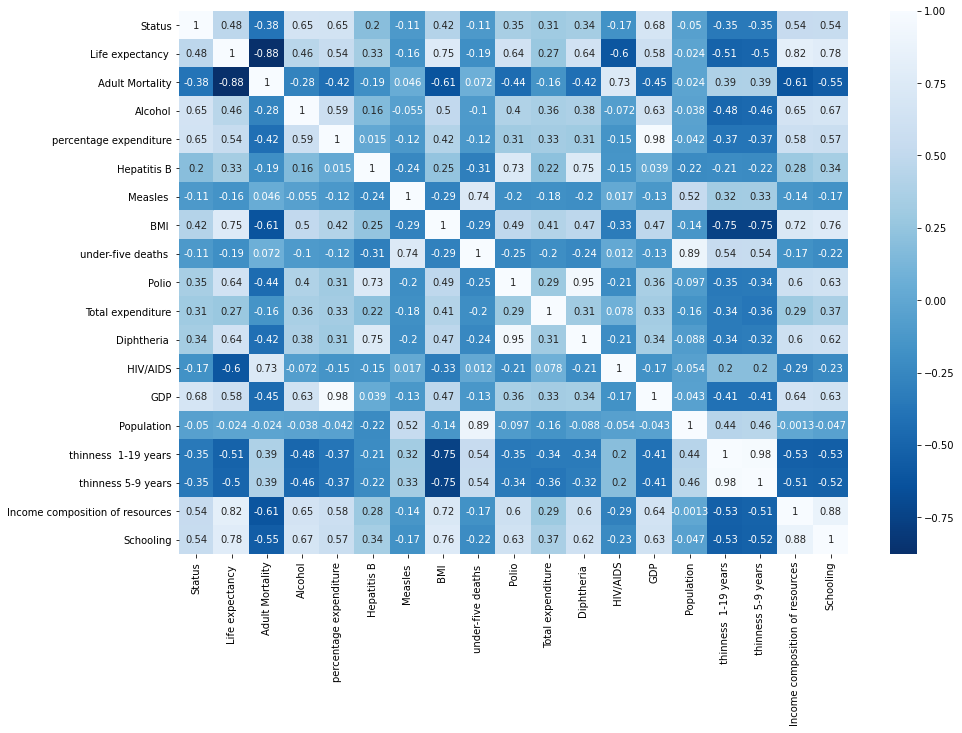

In [26]:
#checking the correlation of features with each other using heatmap
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True, cmap= 'Blues_r')

In [6]:
#creating the new dataframe with the best correlated columns. Based on this we will further define the features and the target variable and train the values.
subset = df[["Life expectancy ", "Population", "Income composition of resources", "percentage expenditure", "Alcohol", "GDP", "Schooling","Adult Mortality"]]


In [16]:
#checking first five colums of subset dataframe
subset.head()

,Life expectancy,Population,Income composition of resources,percentage expenditure,Alcohol,GDP,Schooling,Adult Mortality
Country,,,,,,,,
Afghanistan,58.19375,9.972260e+06,0.415375,34.960110,0.014375,340.015425,8.21250,269.0625
Albania,75.15625,6.969116e+05,0.709875,193.259091,4.848750,2119.726679,12.13750,45.0625
Algeria,73.61875,2.164983e+07,0.694875,236.185241,0.406667,2847.853392,12.71250,108.1875
Angola,49.01875,1.014710e+07,0.458375,102.100268,5.740667,1975.143045,8.04375,328.5625
Argentina,75.15625,2.012120e+07,0.794125,773.038981,7.966667,6998.575103,16.50625,106.0000


In [17]:
#null values 
subset.isna().sum()

Life expectancy                    0
Population                         0
Income composition of resources    0
percentage expenditure             0
Alcohol                            0
GDP                                0
Schooling                          0
Adult Mortality                    0
dtype: int64

In [18]:
#defining function to set the Life expectancy values in binary format and update in a new column(Threshold life_expectancy) for better visualization.
#the two classes are above 60 and below 60.
def encode_life_exp(x):
    if x > 60.0:
        return 1
    else:
        return 0

In [19]:
#adding Threshold life_expectancy in a dataframe 
df['Threshold life_expectancy'] = df['Life expectancy '].apply(encode_life_exp)
df

,Status,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Threshold life_expectancy
Country,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,58.19375,269.0625,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.3750,8.252500,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250,0
Albania,0,75.15625,45.0625,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.1250,5.945625,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750,1
Algeria,0,73.61875,108.1875,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,91.7500,4.604000,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250,1
Angola,0,49.01875,328.5625,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,46.1250,3.919333,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375,0
Argentina,0,75.15625,106.0000,7.966667,773.038981,81.285714,2.0000,54.98125,11.3750,93.3750,6.912667,92.3750,0.10000,6998.575103,2.012120e+07,1.07500,0.95000,0.794125,16.50625,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,0,76.07500,119.9375,6.172667,621.838919,94.312500,0.0000,52.92500,0.7500,94.2500,8.750000,89.1250,0.10000,7192.584875,2.396771e+06,1.60000,1.54375,0.765625,15.23125,1
Uzbekistan,0,68.03125,184.8125,1.608667,44.373450,95.642857,208.4375,34.80625,25.6875,98.5625,5.638000,98.4375,0.20625,651.092359,9.036317e+05,3.14375,3.17500,0.603000,11.64375,1
Vanuatu,0,71.38750,137.8750,0.806667,282.325746,56.125000,20.8750,44.25625,0.0000,66.1875,3.928667,59.0625,0.10000,2000.245518,1.230962e+05,1.56875,1.49375,0.367500,10.56875,1


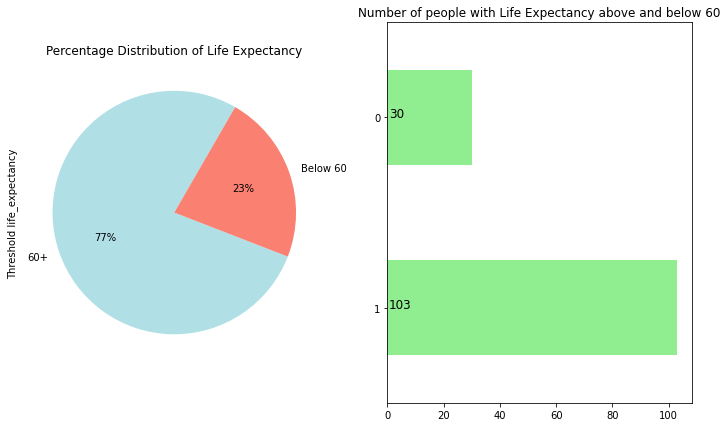

In [20]:
#Visualizing results of Threshold life expectancy using pyplot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(12,7))

ax1 = df['Threshold life_expectancy'].value_counts().plot.pie( colors=['powderblue','Salmon'],autopct = "%1.0f%%",
                                                   labels=["60+","Below 60"], startangle = 60,ax=ax1); 
            
ax1.set(title = 'Percentage Distribution of Life Expectancy')
ax2 = df["Threshold life_expectancy"].value_counts().plot(kind="barh" ,ax =ax2,color='lightgreen')
for i,j in enumerate(df["Threshold life_expectancy"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'Number of people with Life Expectancy above and below 60')
plt.show()

In [6]:
#replacing 1 & 0 of Status column with yes & no for better visualization
df['Status']=df['Status'].replace({0: 'NO', 1: 'YES'})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Life Expectancy Distribution in Developed Countries')

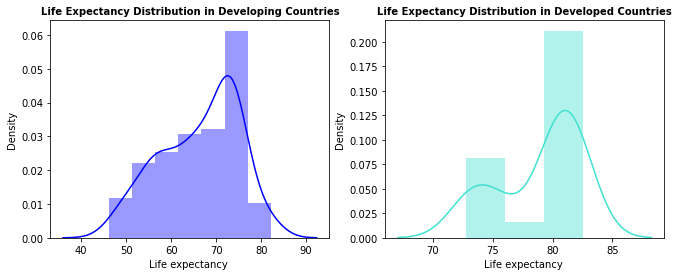

In [12]:
#visualizing Life Expectancy in Developed Countries and Developing Countries
attr_1=df[df['Status']== 'YES']
attr_0=df[df['Status']== 'NO']

fig = plt.figure(figsize=(11,4))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_0['Life expectancy '],color='blue');
plt.title('Life Expectancy Distribution in Developing Countries', fontsize=10, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.distplot(attr_1['Life expectancy '],color='turquoise');
plt.title('Life Expectancy Distribution in Developed Countries', fontsize=10, weight='bold')

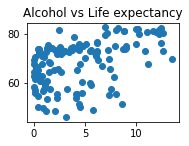

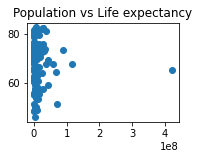

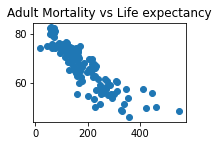

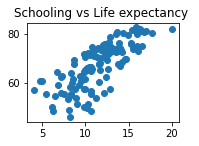

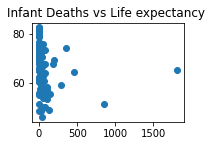

In [23]:
#visualizing impact of Alcohol on Life Expectancy
plt.subplot(2,2,1)
plt.scatter(df['Alcohol'], df['Life expectancy '])
plt.title("Alcohol vs Life expectancy")
plt.show()

#visualizing impact of Population on Life Expectancy

plt.subplot(2,2,2)
plt.scatter(df['Population'], df['Life expectancy '])
plt.title("Population vs Life expectancy")  
plt.show()

#visualizing impact of Adult Mortality on Life Expectancy

plt.subplot(2,2,3)
plt.scatter(df['Adult Mortality'], df['Life expectancy '])
plt.title("Adult Mortality vs Life expectancy")  
plt.show()

#visualizing impact of Schooling on Life Expectancy

plt.subplot(2,2,4)
plt.scatter(df['Schooling'], df['Life expectancy '])
plt.title("Schooling vs Life expectancy ")  
plt.show()

#visualizing relation under-five deaths with Life Expectancy

plt.subplot(2,2,4)
plt.scatter(df['under-five deaths '], df['Life expectancy '])
plt.title("Infant Deaths vs Life expectancy ")  
plt.show()

## Multilinear Regression Model

Importing libraries for Multilinear Regression model

In [24]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns

Splitting the data

In [7]:

#x is independent variable which contain the features that will predict the dependent variable

X = subset.iloc[:,1:]
#y is dependent variable that will get predicted(Life expectancy)
y = subset.iloc[:,0]

In [8]:
#splitting the data as training and test set
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state=0)  

Training and
Fitting the Model 

In [27]:
#creating instance of LinearRegression
regressor = linear_model.LinearRegression()
#fitting the model on data
regressor.fit(X_train, y_train)
#predicting Life expectancy using trained model
response = regressor.predict(X_test)

In [28]:
#predicting the test and train score
print('Train Score: ', regressor.score(X_train, y_train))  
print('Test Score: ', regressor.score(X_test, y_test))  

Train Score:  0.9207406393769001
Test Score:  0.8698571404571992


In [29]:
#checking performance of a model by calculating r-square
r2 = r2_score(y_test, response)
r2

0.8698571404571992

In [30]:
#calculating mean square value of model
mse_score = mean_squared_error(y_test, response)
mse_score

9.871440824001946

Visualizing the Multinear Regression Model

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AxesSubplot(0.125,0.125;0.775x0.755)


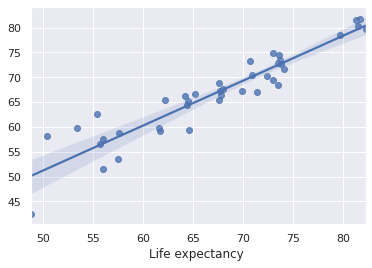

In [31]:
sns.set_theme(color_codes=True)

print(sns.regplot(y_test, response, data=subset))

## Decision Tree Regressor

Imporing libraries for Decision Tree Regressor

In [9]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from sklearn import tree
import pydotplus

Fitting the Model on Data

In [10]:
#creating instance of DecisionTree
regressor = DecisionTreeRegressor(max_depth=3, min_samples_leaf=5, random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [11]:
#predicting Life expectancy using trained model
y_pred = regressor.predict(X_test)
#calculating mean square value of model
mse_dt = mean_squared_error(y_test, y_pred)
mse_dt

NameError: ignored

In [35]:
#checking performance of a model by calculating r-square
print(r2_score(y_test, y_pred))


0.8340507134844658


Visualizing the Decision Tree

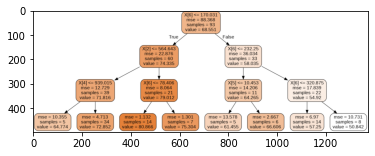

In [12]:
dot_data = export_graphviz(regressor, filled=True, rounded=True, out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png') 
plt.imshow(plt.imread('tree.png'))


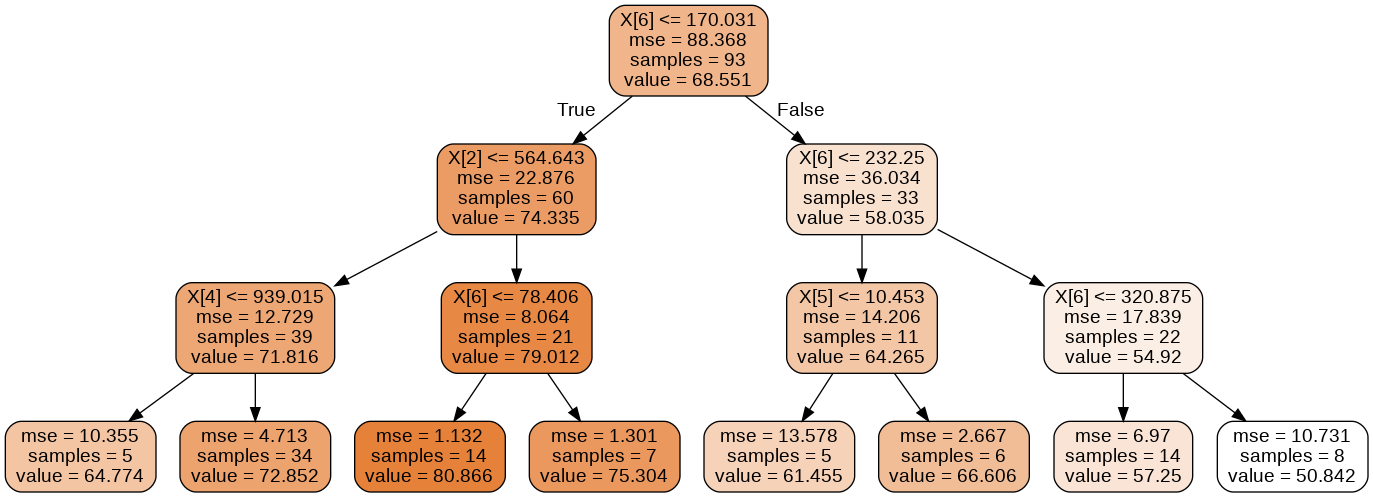